In [1]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
df = pd.read_csv('/Users/kirill/Desktop/статьи/волатильность биткоина/Bitcoin Historical Data - Investing.com.csv')['Price']

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [16]:
from arch import arch_model

In [ ]:
df = df.replace({',':''}, regex=True).astype(float)

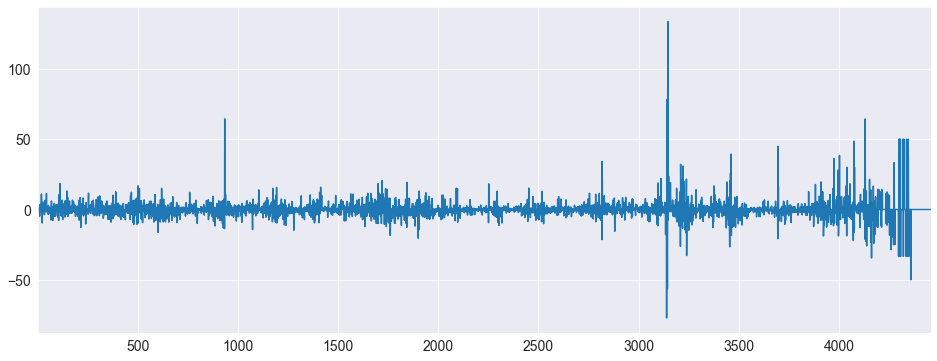

In [30]:
import datetime as dt

import arch.data.sp500

returns = 100 * df.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [31]:
from arch import arch_model

am = arch_model(returns)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     32,   Neg. LLF: 12765.606704748578
Iteration:     10,   Func. Count:     57,   Neg. LLF: 18949.390254534024
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12758.41510774134
            Iterations: 13
            Function evaluations: 84
            Gradient evaluations: 12
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -12758.4
Distribution:                  Normal   AIC:                           25524.8
Method:            Maximum Likelihood   BIC:                           25550.4
                                        No. Observations:                 4458
Date:                Sun, Apr 09 2023   Df Residuals:                     4457
Time:        

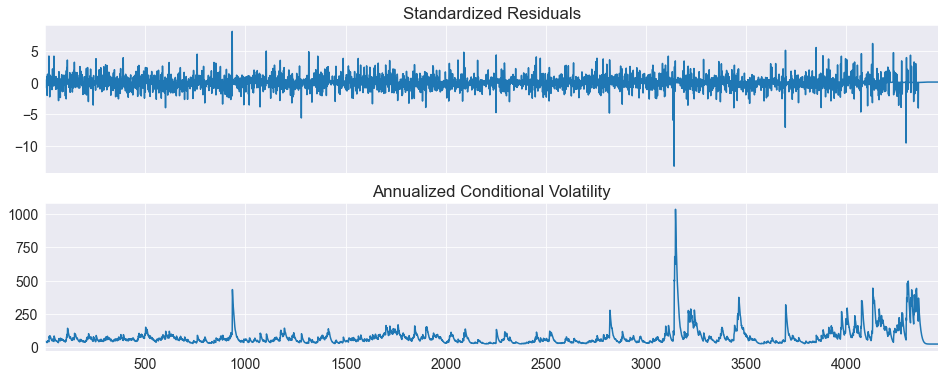

In [32]:
fig = res.plot(annualize="D")

In [33]:
am = arch_model(returns, p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -12687.8
Distribution:                  Normal   AIC:                           25385.5
Method:            Maximum Likelihood   BIC:                           25417.5
                                        No. Observations:                 4458
Date:                Sun, Apr 09 2023   Df Residuals:                     4457
Time:                        09:30:53   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.1036  5.392e-02     -1.921  5.478e-02 [ -0.209,

In [34]:
am = arch_model(returns, p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     45,   Neg. LLF: 18364.949009865784
Iteration:     10,   Func. Count:     77,   Neg. LLF: 14907.803323476412
Iteration:     15,   Func. Count:    126,   Neg. LLF: 10869484.762854481
Iteration:     20,   Func. Count:    170,   Neg. LLF: 12908.560136250331
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 12908.56018956827
            Iterations: 24
            Function evaluations: 170
            Gradient evaluations: 20
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -12908.6
Distribution:                  Normal   AIC:                           25827.1
Method:            Maximum Likelihood   BIC:                           25859.1
              

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [38]:
fixed_res = am.fix([0.0235, 0.01, 0.06, 0.0, 0.9382])
print(fixed_res.summary())

                      Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                         Price   R-squared:                          --
Mean Model:                    Constant Mean   Adj. R-squared:                     --
Vol Model:                       TARCH/ZARCH   Log-Likelihood:               -14277.9
Distribution:                         Normal   AIC:                           28565.8
Method:            User-specified Parameters   BIC:                           28597.8
                                               No. Observations:                 4458
Date:                       Sun, Apr 09 2023                                         
Time:                               09:32:34                                         
      Mean Model     
                 coef
---------------------
mu             0.0235
   Volatility Model  
                 coef
---------------------
omega          0.0100
alpha[1]       0.0600
gamma[1]       0.0000
beta[1

/var/folders/rh/7rjcc_rs68n6wjb41vhqg3dh0000gn/T/ipykernel_91290/1383851796.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df1 = pd.concat([res.conditional_volatility, fixed_res.conditional_volatility], 1)


(1.0, 4458.0)

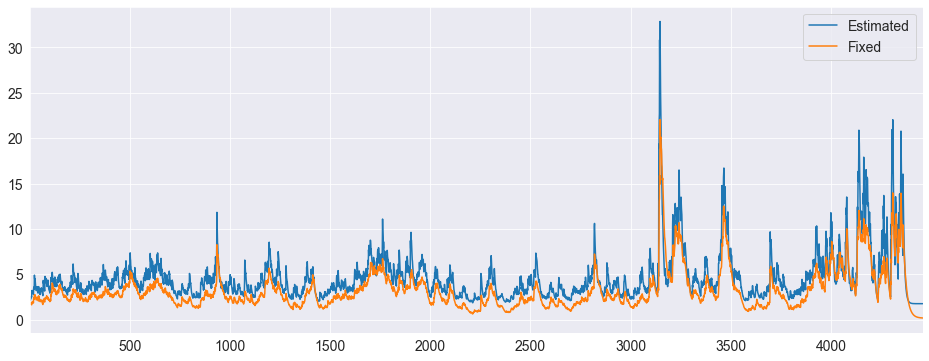

In [39]:
import pandas as pd

df1 = pd.concat([res.conditional_volatility, fixed_res.conditional_volatility], 1)
df1.columns = ["Estimated", "Fixed"]
subplot = df1.plot()
subplot.set_xlim(xlim)